## Convolutional Autoencoder to recreate images.


#### Reference

#### https://colab.research.google.com/drive/1R_RxoOwi4Y9OMmK8PrPyKWRJba8KBsaI?usp=sharing

#### https://www.youtube.com/watch?v=9zKuYvjFFS8&t=528s

#### https://www.youtube.com/watch?v=D9HjlqIrB-c&t=134s

In [1]:
# Importing necessary libraries

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

In [2]:
# Setting random seed value 

tf.random.set_seed(42)

### Mounting Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the dataset from keras.datasets import cifar10.

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


### Data Preprocessing

In [5]:
# Checking the shape of the images

X_train[1].shape

(32, 32, 3)

#### Visualizing the input images

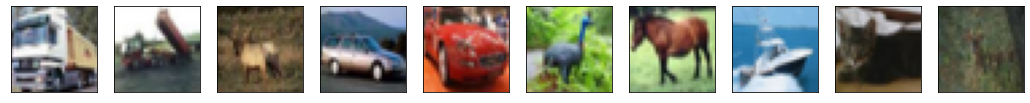

In [6]:
# Plotting 20 images to visualize

plt.figure(figsize=(20, 5))
for i in range(1, 11):
    # Display original
    ax = plt.subplot(1, 11, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
# Scaling the images

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [8]:
# Reshaping the inputimages into vectors (3072-dim vector)

X_train = X_train.reshape((len(X_train), 32,32,3))
X_test = X_test.reshape((len(X_test), 32,32,3))

### Creating a Convolutional Autoencoder

In [69]:
# Input Layer

input_vector = keras.Input(shape=(32, 32, 3))

# Encoder Layer

conv1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_vector)
maxpool1 = layers.MaxPooling2D((2, 2), padding="same")(conv1)

conv2 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(maxpool1)

# latent Layer

latent_layer = layers.MaxPooling2D((2, 2), padding="same")(conv2)

# Decoder Layer

conv_trans1 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(latent_layer)
conv_trans2 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(conv_trans1)

# Output Layer 

output_vector = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(conv_trans2)

## Results using Binary Cross Entropy as Loss Function

In [70]:
# Creating the Model

autoencoder = keras.Model(input_vector, output_vector)

# Compiling the Model

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')



In [71]:
# Model Summary

autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose_71 (Conv2DT (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_transpose_72 (Conv2DT (None, 32, 32, 32)        924

In [73]:
# Defining the batch size and epochs

batch = 256
e = 50

In [74]:
# Training the model

history = autoencoder.fit(X_train, X_train, epochs=e, batch_size=batch, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 6s 24ms/step - loss: 0.6313 - val_loss: 0.5709
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5688 - val_loss: 0.5658
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 0.5638 - val_loss: 0.5644
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5632 - val_loss: 0.5619
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5610 - val_loss: 0.5608
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5600 - val_loss: 0.5603
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5587 - val_loss: 0.5592
Epoch 8/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5580 - val_loss: 0.5600
Epoch 9/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5579 - val_loss: 0.5589
Epoch 10/50
196/196 [==============================] - 4s 22ms/step - loss: 0.5577 - val_lo

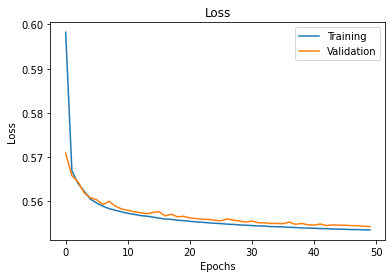

In [75]:
# Visualizing Loss function

epoch_range = range(0,e)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [76]:
# Reconstructing image

recon_imgs = autoencoder.predict(X_test)

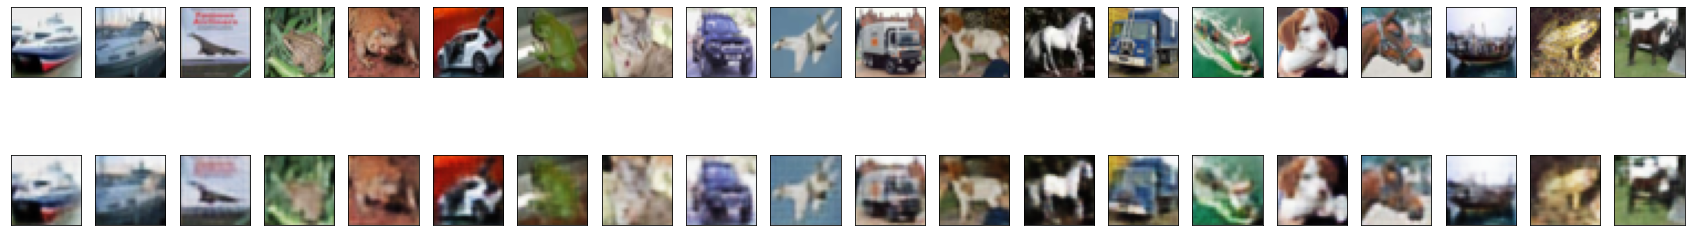

In [77]:
# Visualize reconstructed images

plt.figure(figsize=(30, 5))
for i in range(1, 20 + 1):
    
    # Display original
    ax = plt.subplot(2, 20, i)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 20, i + 20)
    plt.imshow(recon_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Results using Mean Squarred Error as Loss Function

In [78]:
# Creating the Model

autoencoder = keras.Model(input_vector, output_vector)

# Compiling the Model

autoencoder.compile(loss='mean_squared_error', optimizer='adam')


In [79]:
# Model Summary

autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose_71 (Conv2DT (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_transpose_72 (Conv2DT (None, 32, 32, 32)        924

In [80]:
# Defining the batch size and epochs

batch = 256
e = 50

In [81]:
# Training the model

history = autoencoder.fit(X_train, X_train, epochs=e, batch_size=batch, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 2/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0024 - val_lo

In [82]:
# Reconstructing the test images

recon_imgs = autoencoder.predict(X_test)

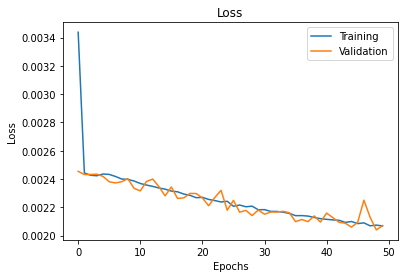

In [83]:
# Visualizing the Loss function

epoch_range = range(0,e)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

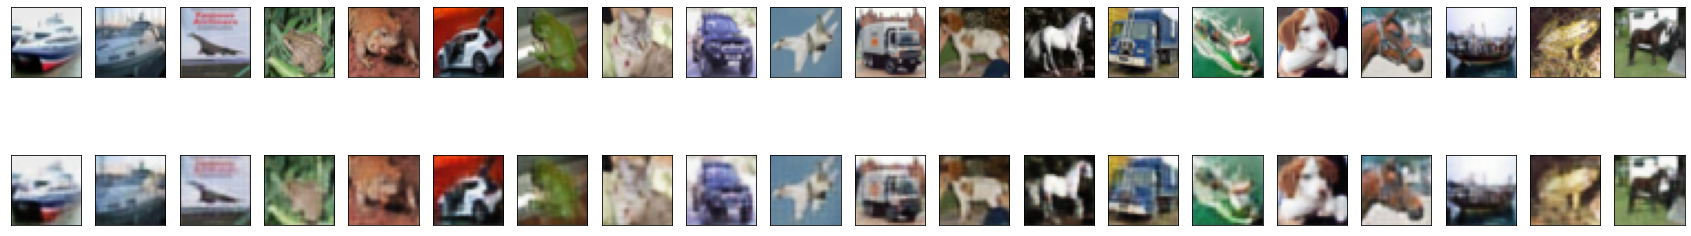

In [84]:
#Visualizing Reconstructed images

plt.figure(figsize=(30, 5))
for i in range(1, 20 + 1):
    # Display original
    ax = plt.subplot(2, 20, i)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 20, i + 20)
    plt.imshow(recon_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Summary

The dataset used for this assignment is 'cifar10'. First the dataset is imported from keras libraries. The images size is 32 by 32 by 3. The first 20 images are visualized. The images are then rescaled to have values between 0 and 1. The images were then converted to a 32,32,3 dimension . A two layered convolution network is built with pooling layer. The neuron architecture is 32->16->8->16->32. It was observed that compressing beyond latent layer of 8 would produce reconstructed image which is distorted. Addition of more layers was degrading the performance of the network

Hyperparameter Tuning.
------------------------------------------------------------

Depth of the Network - Increasing the depth of the network and compressing the latent layer beyond 8 units hampered the performance of the network. Decreasing the depth and increasing the bottleneck size would produce better results. 16 units was the optimal width beyond which the reconstruction degraded

Loss Function : The experiment was started with 'binary cross entropy' as the loss function. For all the fine tuning of other parameters, the loss function was in the range of 0.58 and 0.55. When the loss function was changed to 'mean squarred error', a significant improvement was observed as the loss function was within the range of 0.0057 to 0.0023. The reconstruction using 'mean squarred error' was somewhat better than binary cross entropy.

Epoch - It was observed that the model will converge at about 50

Batch Size - The experiment was performed in the range of 32 - 256 batch size for for both loss function. Best results were obtained for 128/256 batch size.